In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
df=pd.read_csv('/content/drive/MyDrive/My colab notebooks/Foundations data analytics/Project 3 NLP/Keyword_data - Keyword_data.csv')

# Cleaning the data

In [61]:
#checking the null value count for each keyword
df.isnull().sum()

Title         11
Keyword 1     17
Keyword 2     17
Keyword 3     17
Keyword 4     17
Keyword 5     17
Keyword 6     18
Keyword 7     18
Keyword 8     18
Keyword 9     20
Keyword 10    22
Keyword 11    46
Keyword 12    55
dtype: int64

In [62]:
#drop the records where title is a null value

df=df.loc[~df['Title'].isnull()]
df.head()

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
0,Feb/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Meta-Analyses of Financial Performance and Equity: Fusion or Confusion?,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
3,"Home Country Environments, Corporate Diversification Strategies, and Firm Performance",DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
4,Safeguarding Investments in Asymmetric Interorganizational Relationships: Theory and Evidence,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN
5,Managerialist and Human Capital Explanations for Key Executive Pay Premiums: A Contingency Perspective,EXECUTIVE compensation,WAGES,HUMAN capital,LABOR economics,PERSONNEL management,MANAGEMENT science,CONTINGENCY theory (Management),COMPENSATION management,EXECUTIVE ability (Management),CORPORATE governance,NaN,NaN


In [63]:
# drop the records for which the first keyword itself a null value. it indicates that there are no keywords for that title

df=df.loc[~df['Keyword 1'].isnull()]
df.head()

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
2,Meta-Analyses of Financial Performance and Equity: Fusion or Confusion?,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
3,"Home Country Environments, Corporate Diversification Strategies, and Firm Performance",DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
4,Safeguarding Investments in Asymmetric Interorganizational Relationships: Theory and Evidence,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN
5,Managerialist and Human Capital Explanations for Key Executive Pay Premiums: A Contingency Perspective,EXECUTIVE compensation,WAGES,HUMAN capital,LABOR economics,PERSONNEL management,MANAGEMENT science,CONTINGENCY theory (Management),COMPENSATION management,EXECUTIVE ability (Management),CORPORATE governance,NaN,NaN
6,"Bidding Wars Over R&D-Intensive Firms: Knowledge, Opportunism, and the Market for Corporate Control",KNOWLEDGE management,INFORMATION resources management,MANAGEMENT information systems,BREAK-even analysis,DATA mining,MANAGEMENT science,RESEARCH & development,RESEARCH & development contracts,CORPORATE governance,DECISION making,ORGANIZATIONAL behavior,TRANSACTION costs


In [64]:
df.shape

(49, 13)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 2 to 65
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       49 non-null     object
 1   Keyword 1   49 non-null     object
 2   Keyword 2   49 non-null     object
 3   Keyword 3   49 non-null     object
 4   Keyword 4   49 non-null     object
 5   Keyword 5   49 non-null     object
 6   Keyword 6   48 non-null     object
 7   Keyword 7   48 non-null     object
 8   Keyword 8   48 non-null     object
 9   Keyword 9   46 non-null     object
 10  Keyword 10  44 non-null     object
 11  Keyword 11  20 non-null     object
 12  Keyword 12  11 non-null     object
dtypes: object(13)
memory usage: 5.4+ KB


# Extracting the unique keywords

In [66]:
df.shape

(49, 13)

In [67]:
print(type(df.iloc[:,1:].values))
print(df.iloc[:,1:].values.shape)

<class 'numpy.ndarray'>
(49, 12)


In [68]:
 #creating a list of lists containing the keywords  in each document
keywords_all=[]

for index, row in df.iterrows():
  keywords_all.append([keyword.lower() for keyword in list(row[1:]) if not isinstance(keyword, float)])

In [69]:
keywords_all[1]

['diversification in industry',
 'business planning',
 'performance standards',
 'employees -- rating of',
 'corporate culture',
 'strategic planning',
 'organizational effectiveness',
 'management science',
 'management research',
 'product management']

In [70]:
#unique key words
#df.iloc[:,1:].values will create an n-dimensional numpy array containing the values of each dataframe column starting from 'keyword1'.
# ravel flattens the array into an 1D array. Null values are dropped from that array and unique values are taken
keywords_uni=pd.Series(df.iloc[:,1:].values.ravel()).dropna().unique()

In [71]:
keywords_uni=list(keywords_uni)
keywords_uni=list(map(str.lower, keywords_uni))

In [72]:
#number of unique keywords
len(keywords_uni)

248

In [73]:
keywords_uni[0:5]

['equity',
 'organizational sociology',
 'performance',
 'meta-analysis',
 'psychometrics']

# Creating adjacency matrix

In [74]:
#creating a numpy array of dimension 248 
adj=np.zeros((len(keywords_uni),len(keywords_uni)))

In [75]:
len(keywords_all)

49

In [76]:
from itertools import combinations

In [77]:
# creating keyword pairs for each of the 49 documents using combination function
#and creating adjacency matrix containing the weights of each keyword pair
for keyword in keywords_all:
  keyword_pairs=list(combinations(keyword,2))
  for keyword_tuple in keyword_pairs:
    if keyword_tuple[0] in keyword and keyword_tuple[1] in keyword:
      adj[keywords_uni.index(keyword_tuple[0])][keywords_uni.index(keyword_tuple[1])] +=1
      adj[keywords_uni.index(keyword_tuple[1])][keywords_uni.index(keyword_tuple[0])] +=1

#setting the diagonal value to 0 to avoid any keyword paired with itself
np.fill_diagonal(adj, 0)

In [78]:
print(adj)

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 2. ... 0. 0. 0.]
 [1. 2. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


# Compute node degree and strength

In [79]:
import networkx as nx

In [80]:
g=nx.from_numpy_array(adj)

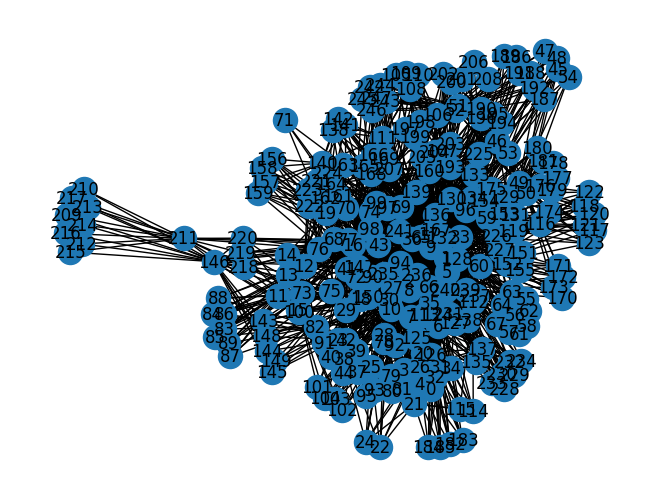

In [81]:
nx.draw(g, with_labels=True)

In [82]:
g.number_of_nodes() 

248

In [83]:
nx.is_weighted(g)

True

In [84]:
g.degree

DegreeView({0: 10, 1: 66, 2: 23, 3: 10, 4: 10, 5: 24, 6: 19, 7: 38, 8: 104, 9: 166, 10: 62, 11: 18, 12: 29, 13: 9, 14: 9, 15: 9, 16: 66, 17: 102, 18: 17, 19: 24, 20: 24, 21: 16, 22: 9, 23: 25, 24: 9, 25: 19, 26: 18, 27: 27, 28: 20, 29: 31, 30: 17, 31: 17, 32: 17, 33: 93, 34: 9, 35: 19, 36: 46, 37: 11, 38: 11, 39: 11, 40: 11, 41: 42, 42: 11, 43: 90, 44: 11, 45: 9, 46: 32, 47: 9, 48: 9, 49: 29, 50: 31, 51: 19, 52: 19, 53: 20, 54: 9, 55: 10, 56: 10, 57: 10, 58: 10, 59: 17, 60: 49, 61: 10, 62: 10, 63: 9, 64: 9, 65: 48, 66: 74, 67: 9, 68: 14, 69: 64, 70: 26, 71: 4, 72: 16, 73: 20, 74: 25, 75: 10, 76: 28, 77: 32, 78: 16, 79: 10, 80: 10, 81: 10, 82: 21, 83: 11, 84: 11, 85: 11, 86: 11, 87: 11, 88: 11, 89: 11, 90: 14, 91: 7, 92: 32, 93: 9, 94: 17, 95: 9, 96: 17, 97: 8, 98: 8, 99: 8, 100: 16, 101: 9, 102: 9, 103: 9, 104: 9, 105: 9, 106: 15, 107: 23, 108: 9, 109: 9, 110: 9, 111: 17, 112: 17, 113: 27, 114: 8, 115: 8, 116: 18, 117: 11, 118: 11, 119: 26, 120: 11, 121: 11, 122: 11, 123: 11, 124: 18, 

In [85]:
# dict(g.degree)

In [86]:
# dict(g.degree(weight='weight'))

In [87]:
#computing degree of each node and converting it to a dictionary
dict_degree=dict(zip(keywords_uni, list(dict(g.degree).values())))

#computing strength of each node and converting it to a dictionary
dict_strength= dict(zip(keywords_uni, list(dict(g.degree(weight='weight')).values())))

In [88]:
dict_strength

{'equity': 10.0,
 'organizational sociology': 96.0,
 'performance': 29.0,
 'meta-analysis': 10.0,
 'psychometrics': 10.0,
 'organizational research': 28.0,
 'financial performance': 21.0,
 'agency theory': 48.0,
 'organizational effectiveness': 144.0,
 'organizational behavior': 265.0,
 'corporate governance': 85.0,
 'diversification in industry': 20.0,
 'business planning': 31.0,
 'performance standards': 9.0,
 'employees -- rating of': 9.0,
 'corporate culture': 9.0,
 'strategic planning': 80.0,
 'management science': 136.0,
 'management research': 19.0,
 'product management': 28.0,
 'interorganizational relations': 27.0,
 'intergroup relations': 17.0,
 'business communication': 9.0,
 'investments': 25.0,
 'supply chains': 9.0,
 'knowledge management': 20.0,
 'interorganizational networks': 19.0,
 'group decision making': 30.0,
 'intellectual capital': 20.0,
 'executive compensation': 36.0,
 'wages': 18.0,
 'human capital': 18.0,
 'labor economics': 18.0,
 'personnel management': 126

In [89]:
#creating dataframe containing the node(keyword) and its correspoding degree and strength
df=pd.DataFrame({'Keyword': keywords_uni, 'Degree':list(dict_degree.values()),'Strength':list(dict_strength.values())})

# Top 10 nodes by degree and top 10 nodes by strength

In [90]:
df.head()

,Keyword,Degree,Strength
0,equity,10,10.0
1,organizational sociology,66,96.0
2,performance,23,29.0
3,meta-analysis,10,10.0
4,psychometrics,10,10.0


In [91]:
#top 10 nodes by degree
df[['Keyword','Degree']].sort_values(by='Degree', ascending=False).head(10)

,Keyword,Degree
9,organizational behavior,166
8,organizational effectiveness,104
17,management science,102
33,personnel management,93
43,decision making,90
66,organizational structure,74
16,strategic planning,66
1,organizational sociology,66
69,industrial management,64
10,corporate governance,62


In [92]:
# top 10 nodes by strength value
df[['Keyword','Strength']].sort_values(by='Strength', ascending=False).head(10)

,Keyword,Strength
9,organizational behavior,265.0
8,organizational effectiveness,144.0
17,management science,136.0
33,personnel management,126.0
43,decision making,112.0
66,organizational structure,107.0
1,organizational sociology,96.0
10,corporate governance,85.0
69,industrial management,84.0
16,strategic planning,80.0


# Top 10 node pairs by weight

In [93]:
edges=list(g.edges)

In [94]:
weights = nx.get_edge_attributes(g, 'weight')
#weights

In [95]:
df_weights=pd.DataFrame({'Edges':weights.keys(),'Weights':weights.values()})

In [96]:
df_weights.head()

,Edges,Weights
0,"(0, 1)",1.0
1,"(0, 2)",1.0
2,"(0, 3)",1.0
3,"(0, 4)",1.0
4,"(0, 5)",1.0


In [97]:
#creating keyword pairs and replacing the edges with keyword names in the dataframe
keyword_pairs=[(keywords_uni[i], keywords_uni[j]) for i, j in g.edges()]

In [98]:
len(keyword_pairs)

2141

In [99]:
#adding a column containing the keyword pair for its corresponding edges
df_weights['Keyword pair']=keyword_pairs

In [100]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-100-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [101]:
# top 10 keyword pairs by weight
df_weights[['Weights','Keyword pair']].sort_values(by='Weights', ascending=False).head(10)

,Weights,Keyword pair
172,11.0,"(organizational effectiveness, organizational behavior)"
309,9.0,"(organizational behavior, organizational structure)"
281,8.0,"(organizational behavior, personnel management)"
271,7.0,"(organizational behavior, management science)"
290,6.0,"(organizational behavior, decision making)"
268,6.0,"(organizational behavior, corporate governance)"
17,6.0,"(organizational sociology, organizational behavior)"
206,6.0,"(organizational effectiveness, organizational structure)"
45,5.0,"(organizational sociology, teams in the workplace)"
308,5.0,"(organizational behavior, organizational change)"


# Average Strength vs Degree

In [102]:
# creating a column in strength and degree dataframe df to store average strength of each node
df_avg_strength=df.groupby('Degree')['Strength'].mean()

In [103]:
df_avg_strength.head()

Degree
4     4.0 
7     7.0 
8     8.0 
9     9.0 
10    10.0
Name: Strength, dtype: float64

In [104]:
type(df_avg_strength)

pandas.core.series.Series

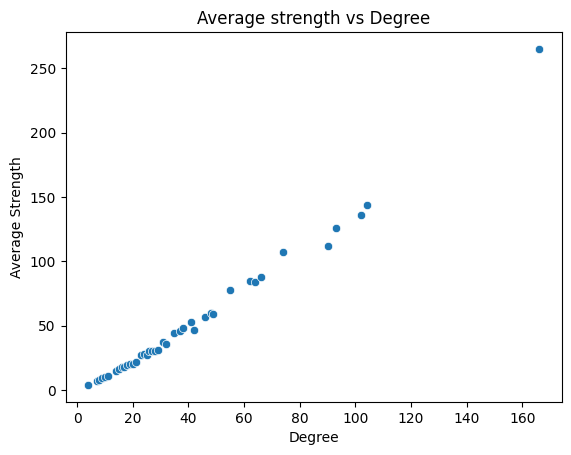

In [105]:
sns.scatterplot(x=df_avg_strength.index, y=df_avg_strength.values)
plt.xlabel('Degree')
plt.ylabel('Average Strength')
plt.title('Average strength vs Degree')
plt.show()